Objectif
Cet ensemble de données contient des données de campagne de marketing bancaire et nous pouvons les utiliser pour optimiser les campagnes marketing afin d’attirer plus de clients vers l’abonnement aux dépôts à terme.

Qu’est-ce qu’un dépôt à terme?

Un dépôt à terme est un dépôt qu’une banque ou une institution financière offre avec un taux fixe (souvent meilleur que la simple ouverture d’un compte de dépôt) dans lequel votre argent sera retourné à un moment d’échéance spécifique.

Instructions
Dans cette tâche, vous devrez suivre les étapes suivantes:

Importez votre jeu de données et effectuez une analyse et une visualisation initiales
Nettoyer les données
Construisez un réseau d’apprentissage profond pour prédire le résultat de la campagne marketing (« dépôt » Oui ou Non)
Vous devez soumettre un fichier de bloc-notes jupyter.

Lien : Premiers pas avec Google Colab

Veuillez vous assurer qu’il s’agit d’un lien public partageable.

In [1]:
pip install tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.10.1 requires keras<2.11,>=2.10.0, but you have keras 2.11.0 which is incompatible.
tensorflow-gpu 2.10.1 requires tensorboard<2.11,>=2.10, but you have tensorboard 2.11.0 which is incompatible.
tensorflow-gpu 2.10.1 requires tensorflow-estimator<2.11,>=2.10.0, but you have tensorflow-estimator 2.11.0 which is incompatible.


  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0
    Uninstalling tensorflow-estimator-2.10.0:
      Successfully uninstalled tensorflow-estimator-2.10.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0


In [2]:
pip install tensorflow-gpu

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.11.0 requires tensorboard<2.12,>=2.11, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.10.0 which is incompatible.



  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.0
    Uninstalling tensorboard-2.11.0:
      Successfully uninstalled tensorboard-2.11.0
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0


In [3]:
conda update conda


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\ZIGUI



In [4]:
conda update anaconda


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\ZIGUI



In [5]:
pip install keras

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import Dense,Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
#copie du dataset
df1 = df.copy() 

In [9]:
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


(11162, 17)

In [10]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
#recherche de valeurs manquantes
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [12]:
#recherche de doublons
df1.duplicated().sum()

0

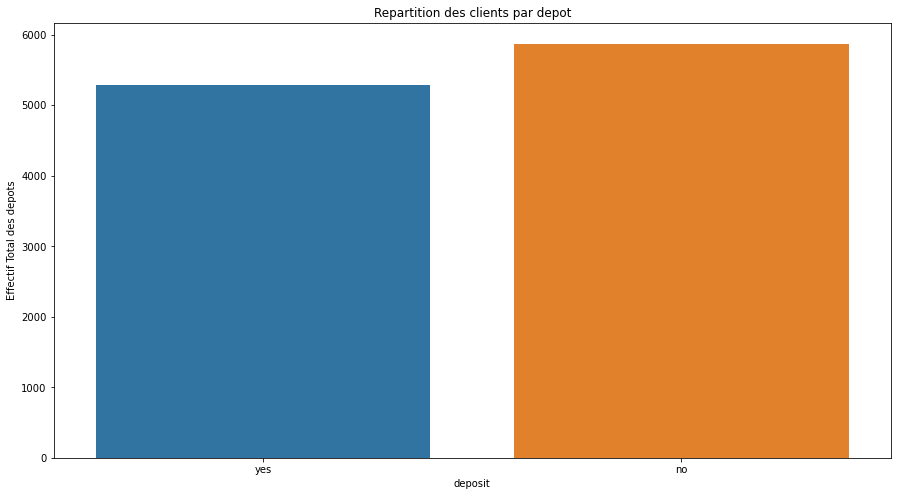

In [13]:
plt.figure(figsize = (15,8))
sns.countplot(x = df1['deposit'])
plt.title("Repartition des clients par depot")
plt.xlabel("deposit")
plt.ylabel('Effectif Total des depots')
plt.show()

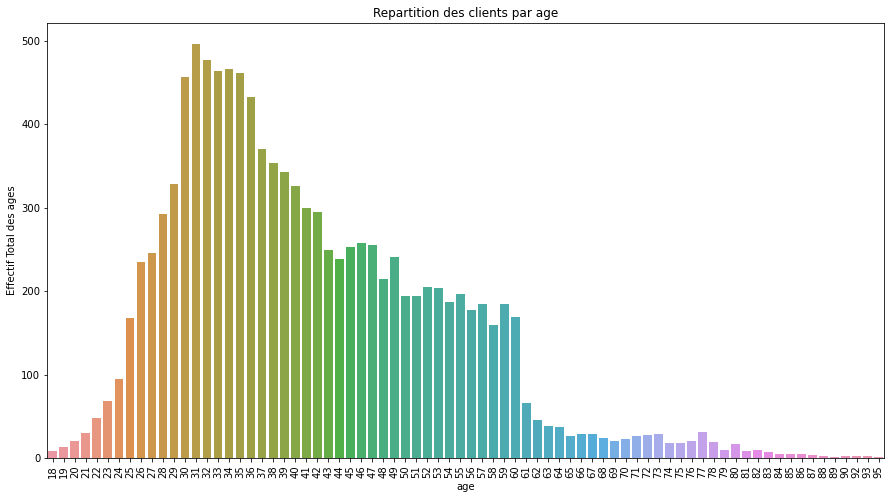

In [14]:
plt.figure(figsize = (15,8))
sns.countplot(x = df1['age'])
plt.title("Repartition des clients par age")
plt.xlabel("age")
plt.xticks(rotation=90)
plt.ylabel('Effectif Total des ages')
plt.show()

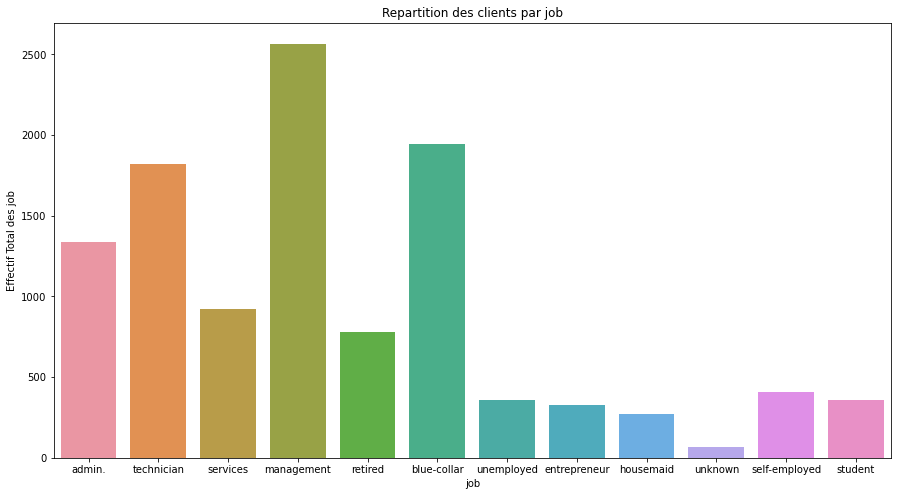

In [15]:
plt.figure(figsize = (15,8))
sns.countplot(x = df1['job'])
plt.title("Repartition des clients par job")
plt.xlabel("job")
plt.ylabel('Effectif Total des job')
plt.show()

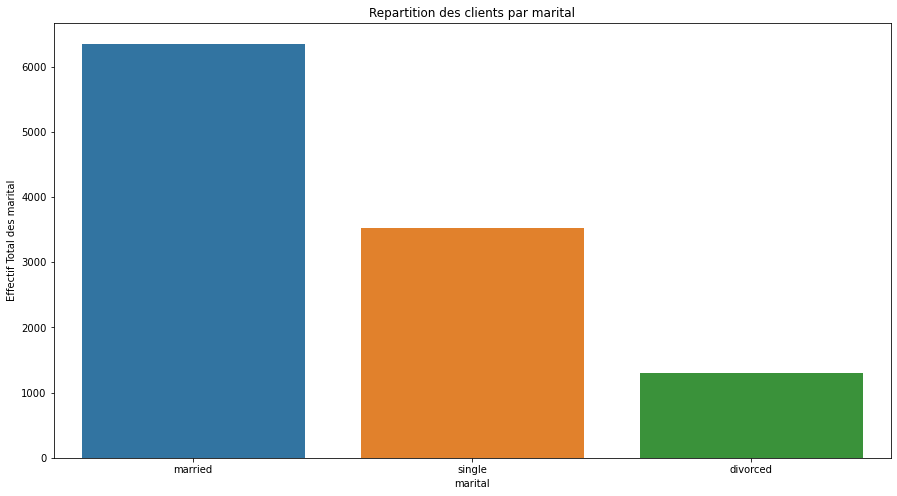

In [16]:
plt.figure(figsize = (15,8))
sns.countplot(x = df1['marital'])
plt.title("Repartition des clients par marital")
plt.xlabel("marital")
plt.ylabel('Effectif Total des marital')
plt.show()

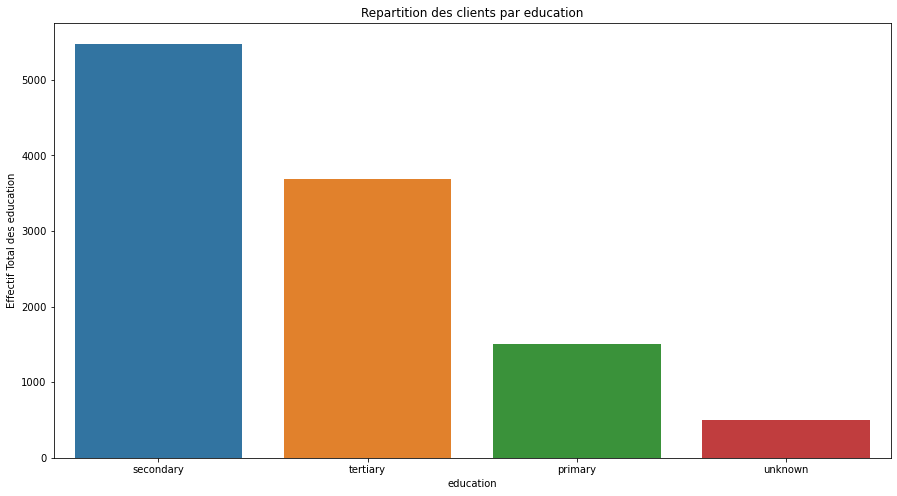

In [17]:
plt.figure(figsize = (15,8))
sns.countplot(x = df1['education'])
plt.title("Repartition des clients par education")
plt.xlabel("education")
plt.ylabel('Effectif Total des education')
plt.show()

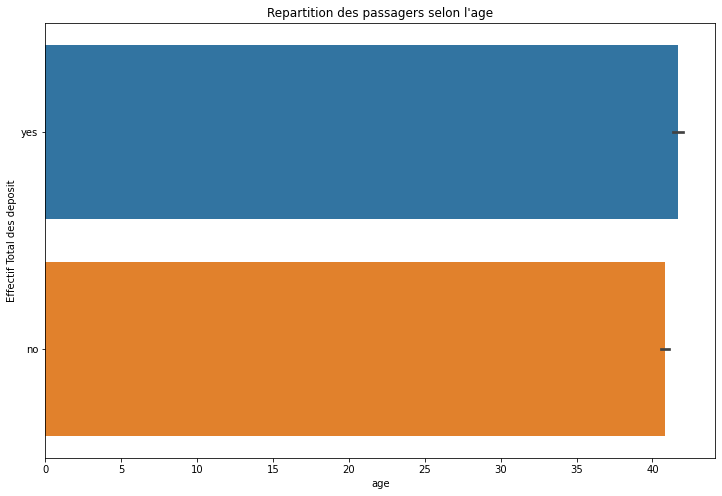

In [18]:
plt.figure(figsize = (12,8))
sns.barplot(data=df1, x= 'age', y= 'deposit')
plt.title("Repartition des passagers selon l'age")
plt.xlabel('age')
plt.ylabel('Effectif Total des deposit')
plt.show()

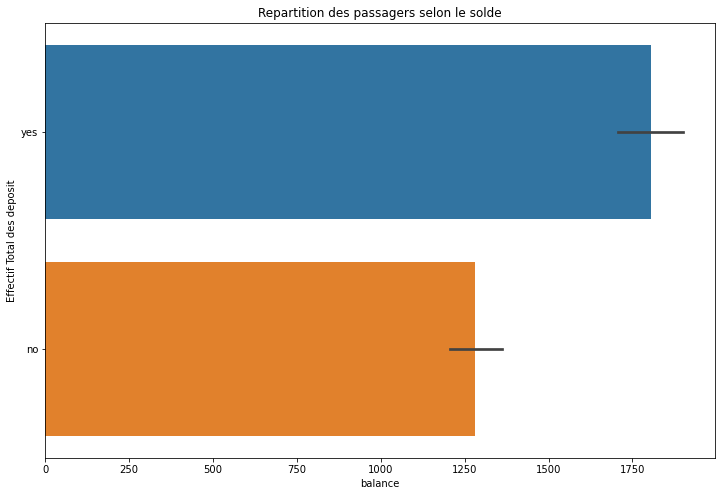

In [19]:
plt.figure(figsize = (12,8))
sns.barplot(data=df1, x= 'balance', y= 'deposit')
plt.title("Repartition des passagers selon le solde")
plt.xlabel('balance')
plt.ylabel('Effectif Total des deposit')
plt.show()

# Construisez un réseau d’apprentissage profond pour prédire le résultat de la campagne marketing

In [20]:
#Encoder les variables non numériques
le=LabelEncoder()
df1= df1.apply(le.fit_transform)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [21]:
X=df1.drop('deposit',axis=1) #Features
y=df1['deposit'] #Labels

# Séparer vos ensembles de données d'entraînement et de test

In [22]:
#Train Test Split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3)

# Normalisons les données

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Construire le réseau de neurones artificiels

In [24]:
batch_size = 10
epochs = 50

model= Sequential([
Dense(256, kernel_initializer = "uniform",activation = "relu", input_dim=16),
Dropout (0.2),    
Dense(512,activation = "relu"),
Dense(1, kernel_initializer = "uniform",activation = "sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 136,449
Trainable params: 136,449
Non-trainable params: 0
_________________________________________________________________


# Compilation du modèle

In [25]:
model.compile(optimizer= "RMSprop",loss = "binary_crossentropy",metrics = ["accuracy"])
history = model.fit(X_train, y_train, validation_split=0.2,batch_size = 10, epochs= 50,verbose=1) 

Epoch 1/50
625/625 [==============================] - 8s 9ms/step - loss: 0.4587 - accuracy: 0.7934 - val_loss: 0.4632 - val_accuracy: 0.8017
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 0.4302 - accuracy: 0.8152 - val_loss: 0.4464 - val_accuracy: 0.7997
Epoch 3/50
625/625 [==============================] - 6s 9ms/step - loss: 0.4227 - accuracy: 0.8170 - val_loss: 0.4362 - val_accuracy: 0.8055
Epoch 4/50
625/625 [==============================] - 5s 9ms/step - loss: 0.4200 - accuracy: 0.8170 - val_loss: 0.4477 - val_accuracy: 0.8049
Epoch 5/50
625/625 [==============================] - 5s 9ms/step - loss: 0.4161 - accuracy: 0.8158 - val_loss: 0.4411 - val_accuracy: 0.7991
Epoch 6/50
625/625 [==============================] - 6s 9ms/step - loss: 0.4107 - accuracy: 0.8200 - val_loss: 0.4407 - val_accuracy: 0.8036
Epoch 7/50
625/625 [==============================] - 5s 9ms/step - loss: 0.4117 - accuracy: 0.8237 - val_loss: 0.4339 - val_accuracy: 0.8061
Epoch 

In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score)

[0.4208771884441376, 0.8178560733795166]
